In [30]:
import sys
sys.path.append("../")
%reload_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from trainbow.utils import database_utils,image_utils

from skimage import exposure
import trainbow.visualizations.image_viewers as viz

In [4]:
plate_id = 'PA16313' #plate id
microscope_id = 6 # techdev scope or nikon 4
#Fluroscent map
channel_map ={
    'DAPI':1,
    'eGFP':2,
    'mOrange':0,
    'mKate2':3,
    'DPC_top':4,
    'DPC_bottom':5,
    'DPC_left':6,
    'DPC_right':7
}

well_map = {
            "Cre-iPSC-low-conc-edu" : ['A01'],
            "Cre-iPSC-high-conc-edu" : ['A02'],
            "Cont-iPSC-low-conc-edu" : ['A03'],
            "Cre-iPSC-low-conc" : ['B01'],
            "Cre-iPSC-high-conc" : ['B02'],
            "Cont-iPSC-low-conc" : ['B03']
}

#make the acquisition dataframe
experiment_acquisition = database_utils.create_acquistion_df(plate_id,microscope_id)
experiment_acquisition = experiment_acquisition.drop_duplicates(subset='file_path', keep="last")

print("there are {} images across {} wells".format(len(experiment_acquisition.file_path.unique()),
                                                   len(experiment_acquisition.well_loc.unique())))

For the plate id PA16313, 1 unique measurements were found
there are 1758 images across 6 wells


In [6]:
#select a random image 
random_image_uid = 'A02-32'
image_path = list(experiment_acquisition[experiment_acquisition.uid == random_image_uid].file_path)[0]
image = database_utils.read_image(image_path)

In [31]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import trainbow.features.intensity_features as int_feat
from skimage.color import rgb2hsv


In [22]:
#get hsv image
rgb_img = image_utils.create_composite_brainbow_image(image,channel_map,True)
hsv_img = rgb2hsv(rgb_img)

DAPI_image =  image[channel_map['DAPI']]
eGFP_image =  image[channel_map['eGFP']]
mOrange_image =  image[channel_map['mOrange']]
mKate_image =  image[channel_map['mKate2']]
            
labelled_image = np.ones([image.shape[1], image.shape[2]])        

In [24]:
int_feat.histogram_feat(labelled_image,mOrange_image)

{'int_sum': 1979883487.0,
 'int_min': 171.0,
 'int_d25': 332.0,
 'int_median': 362.0,
 'int_d75': 395.0,
 'int_max': 33294.0,
 'int_mean': 372.970672795802,
 'int_mode': 361.0,
 'int_sd': 169.38200597773314,
 'kurtosis': 8592.482928805191,
 'skewness': 70.38931060687868,
 'entropy': 7.70680073325372}

In [25]:
int_feat.brainbow_ratio_features(eGFP_image,mOrange_image,mKate_image)

{'mKate_by_mOrange_mean': 1.2159946341920864,
 'mKate_by_eGFP_mean': 0.18281119303392437,
 'eGFP_by_mOrange_mean': 6.699053298748696,
 'mKate_by_mOrange_sd': 0.7842435585083777,
 'mKate_by_eGFP_sd': 0.09632675681549474,
 'eGFP_by_mOrange_sd': 1.9635090303849028}

In [26]:
int_feat.brainbow_colorfulness(eGFP_image,mOrange_image,mKate_image)

{'eom_colorfulness': 2202.9195226752727,
 'emo_colorfulness': 3817.8053278434036,
 'meo_colorfulness': 22107.929596602335,
 'moe_colorfulness': 39617.18015231138,
 'ome_colorfulness': 43837.989308546166,
 'oem_colorfulness': 20529.577682635314}

In [27]:
int_feat.brainbow_cor_features(eGFP_image,mOrange_image,mKate_image)

{'pearson_cor_mKate_mOrange': 0.2458089044724022,
 'pearson_cor_mKate_eGFP': 0.3739630440095348,
 'pearson_cor_eGFP_mOrange': 0.37446967321311586,
 'spearman_cor_mKate_mOrange': 0.32885935908929764,
 'spearman_cor_mKate_eGFP': 0.4594475482119212,
 'spearman_cor_eGFP_mOrange': 0.5461263589799114}

In [28]:
int_feat.brainbow_cov_features(eGFP_image,mOrange_image,mKate_image)

{'cov_mKate_mOrange': 14702.398458765581,
 'cov_mKate_eGFP': 187418.99511615807,
 'cov_eGFP_mOrange': 90021.3701255324}

In [32]:
int_feat.brainbow_intensity_features(regionmask = labelled_image, 
                                           DAPI_image =  image[channel_map['DAPI']],
                                           eGFP_image =  image[channel_map['eGFP']], 
                                           mOrange_image =  image[channel_map['mOrange']], 
                                           mKate_image =  image[channel_map['mKate2']],
                                           hsv_image = hsv_img)

,DAPI_int_sum,DAPI_int_min,DAPI_int_d25,DAPI_int_median,DAPI_int_d75,DAPI_int_max,DAPI_int_mean,DAPI_int_mode,DAPI_int_sd,DAPI_kurtosis,...,value_int_d25,value_int_median,value_int_d75,value_int_max,value_int_mean,value_int_mode,value_int_sd,value_kurtosis,value_skewness,value_entropy
0,1.072123e+09,84.0,169.0,187.0,209.0,2945.0,201.96661,181.0,63.328922,55.605602,...,0.011765,0.015686,0.015686,1.0,0.018562,0.011765,0.02507,419.957036,15.43355,2.794666


In [203]:
%reload_ext autoreload
%autoreload 2

from trainbow.features import segmentation_metrics


In [204]:
feat = segmentation_metrics.evaluate_cell_nuclei_segmentation(cell_mask, nuc_mask)

In [205]:
feat

{'num_of_cells': 651,
 'num_of_nuclei': 749,
 'num_of_cells_with_no_nuc': 46,
 'num_of_nuc_with_no_cells': 139,
 'num_of_cells_with_mismatched_nuc_labels': 1,
 'num_of_cells_with_more_than_one_nuc': 169,
 'num_of_well_matched_cells_nuc': 435}

In [199]:
#get the regionprops of cell mask with nuclear masks
props = measure.regionprops(cell_mask, nuc_mask)
feat = pd.DataFrame()
for flag in (range(len(props))):
    features = pd.concat(
            [pd.DataFrame([flag+1], columns=["object_label"]),
             pd.DataFrame([segmentation_metrics.evaluate_cell_nuclei_segmentation(
                 instances_in_label = props[flag].intensity_image, 
                                  obj_label = props[flag].label)]).reset_index(drop=True)
            ],axis=1)
    feat = pd.concat([feat,features], ignore_index = True)
feat1=feat

TypeError: evaluate_cell_nuclei_segmentation() got an unexpected keyword argument 'instances_in_label'

In [173]:
#get the regionprops of cell mask with nuclear masks
props = measure.regionprops(nuc_mask, cell_mask)
feat = pd.DataFrame()
for flag in (range(len(props))):
    features = pd.concat(
            [pd.DataFrame([flag+1], columns=["object_label"]),
             pd.DataFrame([segmentation_metrics.evaluate_cell_nuclei_segmentation(
                 instances_in_label = props[flag].intensity_image, 
                                  obj_label = props[flag].label)]).reset_index(drop=True)
            ],axis=1)
    feat = pd.concat([feat,features], ignore_index = True)
feat2=feat

In [175]:
num_of_cells = feat1.shape[0]
num_of_cells_with_no_nuc = np.sum(feat1.num_of_instances_in_label==0)
num_of_cells_with_mismatched_nuc_labels = np.sum(feat1[feat1.instance_number_same_as_label<1].num_of_instances_in_label>0)
num_of_cells_with_more_than_one_nuc = np.sum(feat1.num_of_instances_in_label>1)
well_matched_cells_nuc = feat1[(feat1.instance_number_same_as_label == 1) & (feat1.num_of_instances_in_label ==1)].shape[0]



In [176]:
num_of_nuc_with_no_cells = np.sum(feat2.num_of_instances_in_label==0)
num_of_nuc_with_mismatched_cell_labels = np.sum(feat2[feat2.instance_number_same_as_label<1].num_of_instances_in_label>0)
num_of_nuc_with_more_than_one_cell = np.sum(feat2.num_of_instances_in_label>1)
well_matched_nuc_cells = feat2[(feat2.instance_number_same_as_label == 1) & (feat2.num_of_instances_in_label ==1)].shape[0]

In [195]:
num_of_cells_with_more_than_one_nuc

169

In [163]:
good_1 = feat1[(feat1.instance_number_same_as_label == 1) & (feat1.num_of_instances_in_cell ==1)]
good_2 = feat2[(feat2.instance_number_same_as_label == 1) & (feat2.num_of_instances_in_cell ==1)]


In [165]:
len(list(set(good_2.label).intersection(set(good_1.label))))

345

0       20
1       23
2       25
3       26
4       28
      ... 
646    725
647    727
648    728
649    731
650    732
Name: label, Length: 651, dtype: int64

In [47]:
segments,seg_rag,seg_rag,out = cseg.color_seg_slic_rag(image_path, channel_map,rag_thresh = 25)

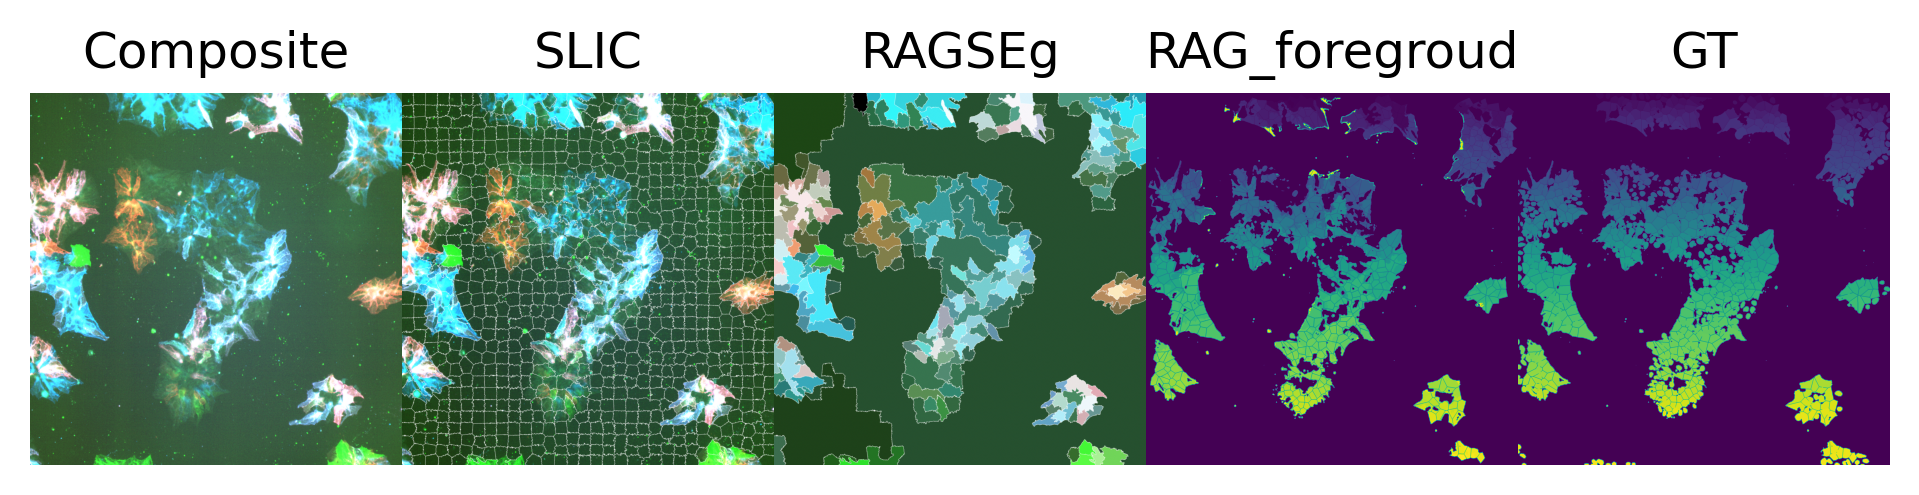

In [66]:
#Increase the image contrast
corrected_image = utils.image_utils.create_composite_brainbow_image(image, channel_map)

corrected_image = exposure.adjust_gamma(corrected_image, gamma =1, gain = 10)

fig = plt.figure(figsize=(8, 2),dpi=300)
fig.subplots_adjust(hspace = 0, wspace= 0)
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

ax1.imshow(corrected_image,alpha=0.9)
ax1.axis('off')
ax1.set_title('Composite')

ax2.imshow(skseg.mark_boundaries(corrected_image, segments,color=[1,1,1]))
ax2.axis('off')
ax2.set_title('SLIC')

ax3.imshow(out)
ax3.axis('off')
ax3.set_title('RAGSEg')

ax4.imshow(np.multiply(seg_rag,cell_mask>0))
ax4.axis('off')
ax4.set_title('RAG_foregroud')

ax5.imshow(truths)
ax5.axis('off')
ax5.set_title('GT')


fig.show()

In [62]:
thresholds = [0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7]
seg_eff = evaluate_segementation_whole_dataset([cell_mask],[np.multiply(seg_rag, cell_mask>0)],thresholds)


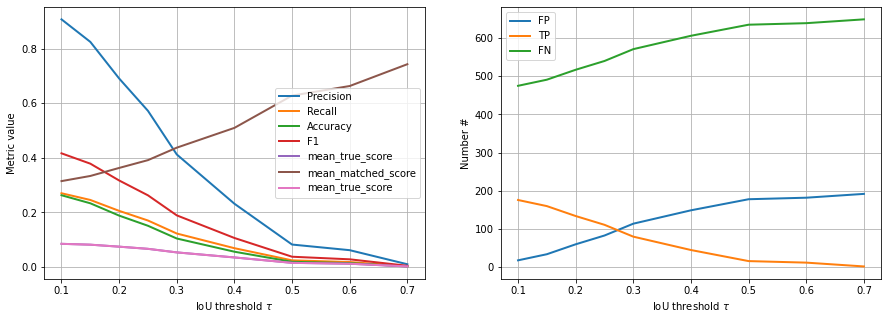

In [63]:
#plot the results
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
for m in ('Precision', 'Recall', 'Accuracy', 'F1', 'mean_true_score', 'mean_matched_score', 'mean_true_score'):
    ax1.plot(thresholds, seg_eff[m], lw=2, label=m)
    ax1.set_xlabel(r'IoU threshold $\tau$')
    ax1.set_ylabel('Metric value')
    ax1.grid()
    ax1.legend()

for m in ('FP', 'TP', 'FN'):
    ax2.errorbar(thresholds, seg_eff[m], lw=2, label=m)
    ax2.set_xlabel(r'IoU threshold $\tau$')
    ax2.set_ylabel('Number #')
    ax2.grid()
    ax2.legend();